In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


In [ ]:
url="https://api.openweathermap.org/data/2.5/weather?q="
city_data=[]
print("Beginning Data Retrieval")
print("-----------------------------")
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
#         
#     print(city_url)
    
#     Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     Add 1 to the record count
    record_count += 1
    try:
         # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind =city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | fort bragg
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | lihue
Processing Record 6 of Set 1 | badger
Processing Record 7 of Set 1 | keflavik
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | akureyri
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | yambio
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | afaahiti
Processing Record 17 of Set 1 | kill devil hills
Processing Record 18 of Set 1 | cascais
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | mahanje
Processing Record 21 of Set 1 | north battleford
Processing Record 22 of Set 1 | saint-ge

Processing Record 41 of Set 4 | fortuna
Processing Record 42 of Set 4 | iskateley
Processing Record 43 of Set 4 | holualoa
Processing Record 44 of Set 4 | ulladulla
Processing Record 45 of Set 4 | namsos
Processing Record 46 of Set 4 | guerrero negro
Processing Record 47 of Set 4 | sungai besar
Processing Record 48 of Set 4 | livingston
Processing Record 49 of Set 4 | amsterdam
Processing Record 0 of Set 5 | lisakovsk
Processing Record 1 of Set 5 | shingu
Processing Record 2 of Set 5 | sisimiut
Processing Record 3 of Set 5 | codrington
Processing Record 4 of Set 5 | dubbo
Processing Record 5 of Set 5 | ulsteinvik
Processing Record 6 of Set 5 | maseru
Processing Record 7 of Set 5 | touros
Processing Record 8 of Set 5 | nilsia
Processing Record 9 of Set 5 | tucuma
Processing Record 10 of Set 5 | vanimo
Processing Record 11 of Set 5 | neryungri
Processing Record 12 of Set 5 | katsuura
Processing Record 13 of Set 5 | devonport
Processing Record 14 of Set 5 | selfoss
Processing Record 15 of

Processing Record 32 of Set 8 | igarka
Processing Record 33 of Set 8 | khandyga
Processing Record 34 of Set 8 | tonota
Processing Record 35 of Set 8 | three rivers
Processing Record 36 of Set 8 | lukoyanov
Processing Record 37 of Set 8 | jayapura
Processing Record 38 of Set 8 | marietta
Processing Record 39 of Set 8 | nabire
Processing Record 40 of Set 8 | bac lieu
Processing Record 41 of Set 8 | el granada
Processing Record 42 of Set 8 | itaituba
Processing Record 43 of Set 8 | alo
Processing Record 44 of Set 8 | tsiombe
Processing Record 45 of Set 8 | wamba
Processing Record 46 of Set 8 | rikaze
Processing Record 47 of Set 8 | crane
Processing Record 48 of Set 8 | bamboo flat
Processing Record 49 of Set 8 | sima
Processing Record 0 of Set 9 | sao francisco do sul
Processing Record 1 of Set 9 | anloga
Processing Record 2 of Set 9 | manadhoo
Processing Record 3 of Set 9 | fuvahmulah
City not found. Skipping...
Processing Record 4 of Set 9 | hauterive
Processing Record 5 of Set 9 | hach

In [4]:
city_df=pd.DataFrame(city_data)
city_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,watford city,47.8022,-103.2832,306.07,33,0,2.57,US,1686180025
1,shenjiamen,29.9576,122.2980,294.69,98,78,2.78,CN,1686180025
2,puerto ayora,-0.7393,-90.3518,299.01,89,94,2.68,EC,1686180026
3,tindouf,27.6711,-8.1474,302.40,39,0,3.60,DZ,1686180026
4,klaksvik,62.2266,-6.5890,281.66,85,100,4.76,FO,1686180026


In [6]:
city_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
city_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,watford city,47.8022,-103.2832,306.07,33,0,2.57,US,1686180025
1,shenjiamen,29.9576,122.2980,294.69,98,78,2.78,CN,1686180025
2,puerto ayora,-0.7393,-90.3518,299.01,89,94,2.68,EC,1686180026
3,tindouf,27.6711,-8.1474,302.40,39,0,3.60,DZ,1686180026
4,klaksvik,62.2266,-6.5890,281.66,85,100,4.76,FO,1686180026
...,...,...,...,...,...,...,...,...,...
558,nabire,-3.3667,135.4833,299.82,81,71,0.83,ID,1686180172
559,tuzha,57.6062,47.9360,283.89,92,97,5.98,RU,1686180172
560,essaouira,31.5125,-9.7700,300.87,78,75,3.60,MA,1686179762


<Axes: title={'center': 'City max lattitude vs Temprature'}, xlabel='Latitude', ylabel='Maximum Temp '>

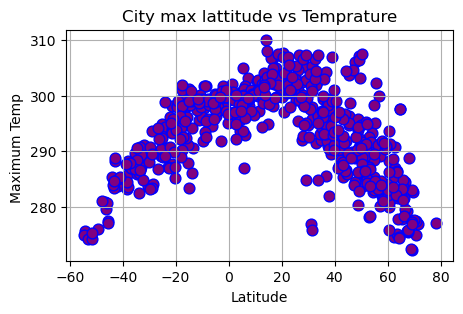

In [8]:
#Lattitude vs temprature scatter plot
city_df.plot.scatter(x="Lat",y="Max Temp",xlabel="Latitude",ylabel="Maximum Temp ",
                     title="City max lattitude vs Temprature",grid=True,c="purple",s=60,
                    edgecolors="blue",figsize=(5,3))

<Axes: title={'center': 'City max lattitude vs Humidity'}, xlabel='Latitude', ylabel='Humidity '>

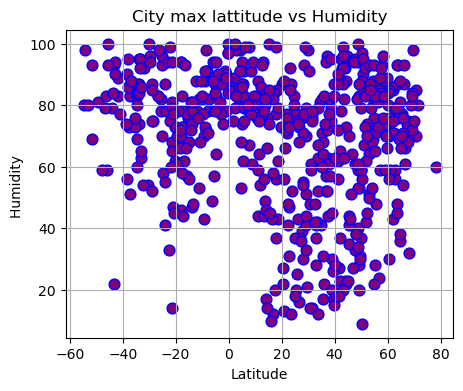

In [9]:
#Latitude vs.Humidity
city_df.plot.scatter(x="Lat",y="Humidity",xlabel="Latitude",ylabel="Humidity ",
                     title="City max lattitude vs Humidity",grid=True,c="purple",s=60,
                    edgecolors="blue",figsize=(5,4))

<Axes: title={'center': 'City max lattitude vs Cloudiness'}, xlabel='Latitude', ylabel='Cloudiness'>

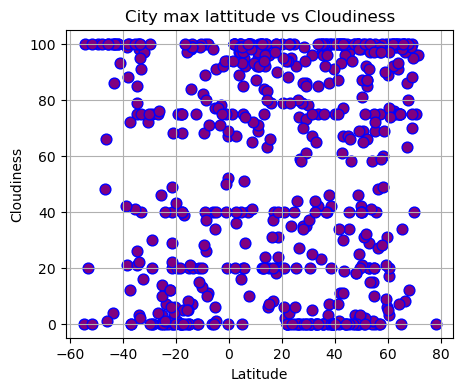

In [10]:
#Latitude vs. Cloudiness
city_df.plot.scatter(x="Lat",y="Cloudiness",xlabel="Latitude",ylabel="Cloudiness",
                     title="City max lattitude vs Cloudiness",grid=True,c="purple",s=60,
                    edgecolors="blue",figsize=(5,4))

<Axes: title={'center': 'City max lattitude vs Wind Speed'}, xlabel='Latitude', ylabel='Wind Speed'>

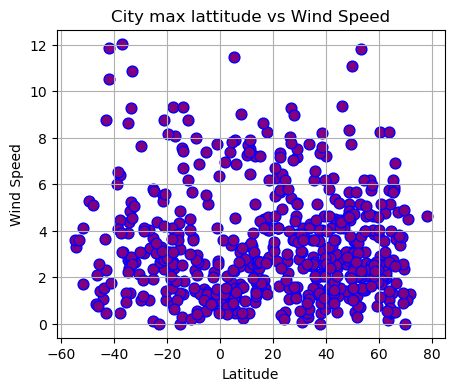

In [11]:
#latitude vs windspeed
city_df.plot.scatter(x="Lat",y="Wind Speed",xlabel="Latitude",ylabel="Wind Speed",
                     title="City max lattitude vs Wind Speed",grid=True,c="purple",s=60,
                    edgecolors="blue",figsize=(5,4))

In [12]:
northen_hemi_df=city_df.loc[city_df["Lat"]>=0,]
northen_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,watford city,47.8022,-103.2832,306.07,33,0,2.57,US,1686180025
1,shenjiamen,29.9576,122.2980,294.69,98,78,2.78,CN,1686180025
3,tindouf,27.6711,-8.1474,302.40,39,0,3.60,DZ,1686180026
4,klaksvik,62.2266,-6.5890,281.66,85,100,4.76,FO,1686180026
5,albany,42.6001,-73.9662,287.39,78,100,2.72,US,1686179814
...,...,...,...,...,...,...,...,...,...
555,kalmunai,7.4167,81.8167,299.68,80,100,2.67,LK,1686180171
556,leninskoye,41.7589,69.3864,297.14,18,34,2.40,KZ,1686180171
559,tuzha,57.6062,47.9360,283.89,92,97,5.98,RU,1686180172


The r-squared is: 0.5354163966446063


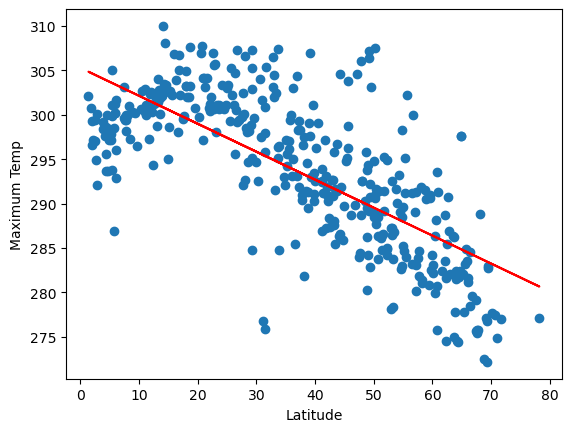

In [13]:
x_values=northen_hemi_df["Lat"]
y_values=northen_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temp")
plt.show()

In [14]:
southen_hemi_df=city_df.loc[city_df["Lat"]<0,]
southen_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto ayora,-0.7393,-90.3518,299.01,89,94,2.68,EC,1686180026
6,grytviken,-54.2811,-36.5092,275.58,98,100,3.29,GS,1686180027
7,margaret river,-33.9500,115.0667,288.33,74,98,4.86,AU,1686180027
10,saint-pierre,-21.3393,55.4781,293.97,68,40,2.57,RE,1686180028
12,edinburgh of the seven seas,-37.0676,-12.3116,288.15,83,12,12.05,SH,1686179756
...,...,...,...,...,...,...,...,...,...
548,arica,-18.4750,-70.3042,292.28,72,20,2.06,CL,1686180081
550,forbes,-33.3833,148.0167,286.54,92,100,9.30,AU,1686180170
557,letlhakeng,-24.0944,25.0298,289.12,41,1,3.48,BW,1686180172


The r-squared is: 0.7259719827749542


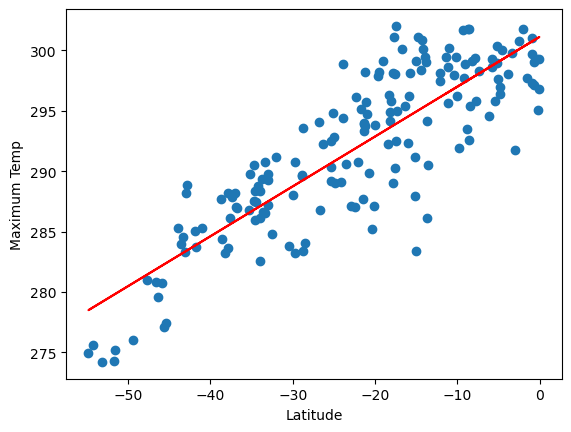

In [15]:
#Temp vs. Lattitude linera regression on southen hemisphere
x_values=southen_hemi_df["Lat"]
y_values=southen_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temp")
plt.show()

The r-squared is: 0.00244992197185698


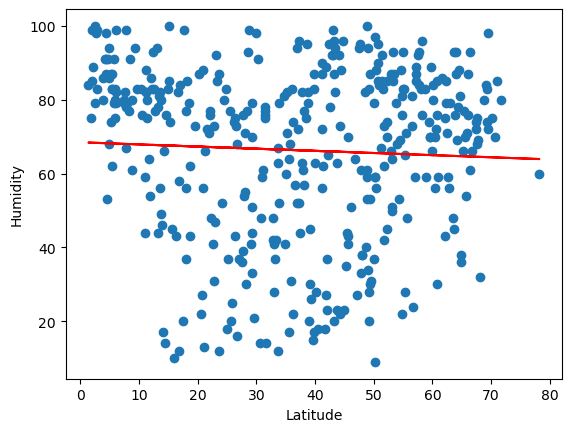

In [16]:
x_values=northen_hemi_df["Lat"]
y_values=northen_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-squared is: 0.00018525277763784003


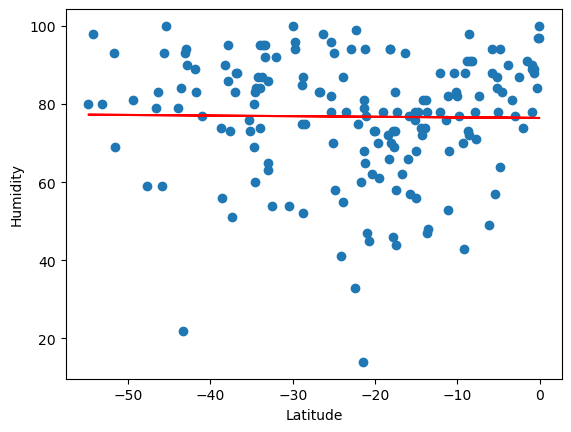

In [17]:
x_values=southen_hemi_df["Lat"]
y_values=southen_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-squared is: 0.001333977853313348


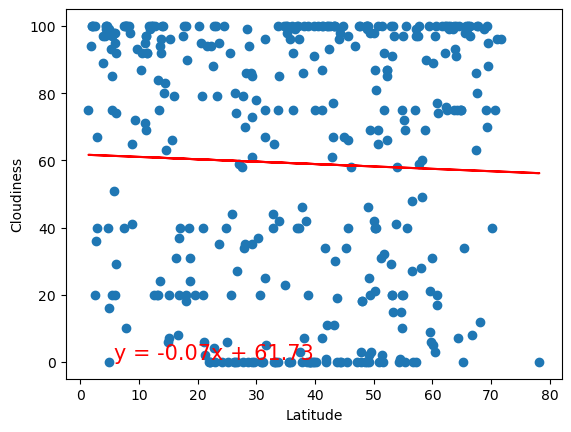

In [18]:
x_values=northen_hemi_df["Lat"]
y_values=northen_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-squared is: 0.01856173253229482


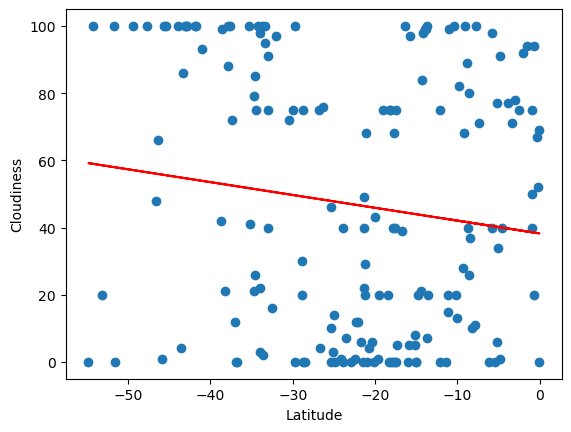

In [19]:
x_values=southen_hemi_df["Lat"]
y_values=southen_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-squared is: 0.0004207729543336588


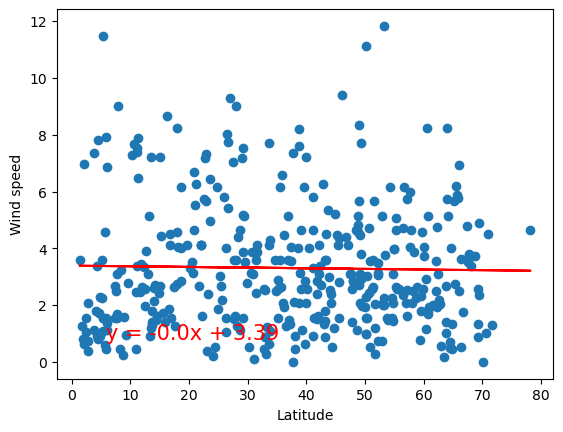

In [20]:
x_values=northen_hemi_df["Lat"]
y_values=northen_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.show()

The r-squared is: 0.021022008414013735


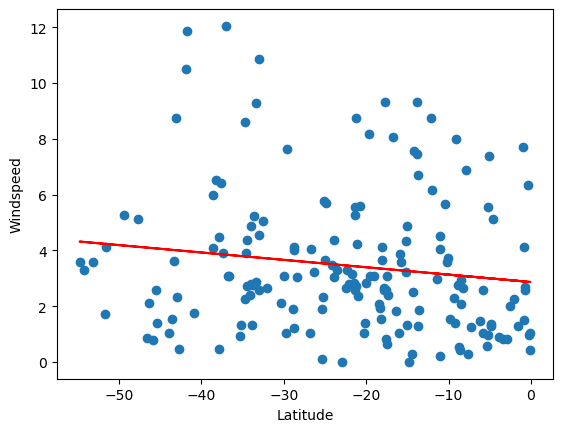

In [21]:
x_values=southen_hemi_df["Lat"]
y_values=southen_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.show()